### Load tensorflow

In [1]:
import tensorflow as tf
import numpy as np

### Collect Data

We will use MNIST dataset for this exercise. This dataset contains images of hand written numbers with each image being a black & white picture of size 28x28. We will download the data using tensorflow API. The dataset has 60,000 training examples and 10,000 test examples. Please note that images have already been converted to numpy arrays.

In [2]:
#Download dataset
(trainX, trainY),(testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
#Check number of training examples and size of each example
trainX.shape

(60000, 28, 28)

In [4]:
#testX[0]

In [5]:
#Check number of test examples and size of each example
testX.shape

(10000, 28, 28)

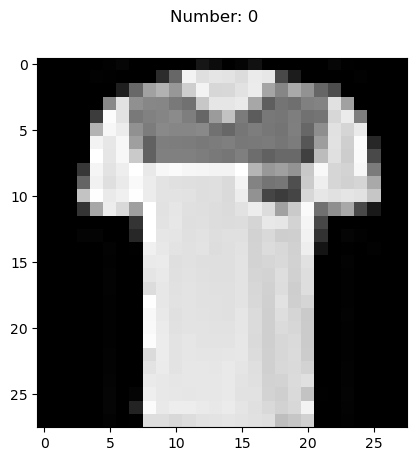

In [6]:
#Let's review the data
import matplotlib.pyplot as plt
img_num = np.random.randint(0, testX.shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(testX[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(testY[img_num]))
plt.show()

### Convert Output label to multiple values

In [7]:
#Check current label size
testY[0]

9

In [8]:
#Convert labels to one hot encoding
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [9]:
#Now check the label size
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [28]:
# Normalize the data
trainX = trainX / 255.0
testX = testX / 255.0

## Build the Graph

In [31]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [30]:
#Clear any existing model in memory
#tf.keras.backend.clear_session()

#Initialize Sequential model
#model = tf.keras.models.Sequential()

#Normalize the data
#model.add(tf.keras.layers.BatchNormalization(input_shape=(13,)))

## Build the Graph
We will build a model with 4 hidden layers. Number of neurons in hidden layer will be 200, 100, 60 and 30 respectively. Both number of hidden layers and number of neurons in each hidden layer are hyperparameters *i.e* you can change these values to improve the model. Output of each neuron in hidden layer will be passed through an activation function.

In [32]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [33]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [34]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [35]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [36]:
#Add OUTPUT layer
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

## Build the Graph...

In [37]:
#Compile the model
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=sgd_optimizer,
              #loss='mse',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Review model

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 batch_normalization_1 (Bat  (None, 200)               800       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)               4

In [25]:
190000*4

760000

## Train the model

In [39]:
mckpt = tf.keras.callbacks.ModelCheckpoint('mnist_sgd_mom.h5', 
                                           monitor='val_accuracy', save_best_only=True, verbose=1)

In [40]:
model.fit(trainX,trainY,validation_data=(testX,testY),epochs=1,batch_size=32,callbacks = [mckpt])

1875/1875 [==============================] - ETA: 0s - loss: 0.5164 - accuracy: 0.8186
Epoch 1: val_accuracy improved from -inf to 0.84600, saving model to mnist_sgd_mom.h5


C:\Users\dibya_xo5nlek\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 104s 45ms/step - loss: 0.5164 - accuracy: 0.8186 - val_loss: 0.4136 - val_accuracy: 0.8460


In [42]:
190000*4

760000

In [49]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is C6CE-F4F0

 Directory of C:\Users\dibya_xo5nlek\Documents\Documents\DL

08/05/2023  03:40 PM    <DIR>          .
08/05/2023  03:40 PM    <DIR>          ..
08/04/2023  10:40 PM    <DIR>          .ipynb_checkpoints
08/05/2023  03:40 PM            31,986 1. Classification_MNIST_DNN_Keras.ipynb
08/05/2023  03:40 PM            12,126 1a. MNIST_DNN_Keras_ADAM_RELU.ipynb
08/05/2023  12:58 PM             9,618 1b. Classification_MNIST_DNN_Keras_decay.ipynb
08/05/2023  12:58 PM            17,971 1c. Classification_MNIST_DNN_Keras - NN1.ipynb
08/05/2023  12:58 PM            49,658 Improving the ML Model - Different techniques.ipynb
08/04/2023  08:17 PM           555,008 Iris.ipynb
08/05/2023  03:39 PM           809,600 mnist_dnn_v1.h5
08/05/2023  12:55 PM            14,185 MNIST_FASHION_Exercise.ipynb
08/05/2023  03:39 PM           809,600 mnist_sgd.h5
08/05/2023  03:37 PM         1,579,480 mnist_sgd_mom.h5
08/05/2023  12:49 PM            23

In [44]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.save('mnist_sgd.h5')

In [50]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is C6CE-F4F0

 Directory of C:\Users\dibya_xo5nlek\Documents\Documents\DL

08/05/2023  03:40 PM    <DIR>          .
08/05/2023  03:40 PM    <DIR>          ..
08/04/2023  10:40 PM    <DIR>          .ipynb_checkpoints
08/05/2023  03:40 PM            31,986 1. Classification_MNIST_DNN_Keras.ipynb
08/05/2023  03:40 PM            12,126 1a. MNIST_DNN_Keras_ADAM_RELU.ipynb
08/05/2023  12:58 PM             9,618 1b. Classification_MNIST_DNN_Keras_decay.ipynb
08/05/2023  12:58 PM            17,971 1c. Classification_MNIST_DNN_Keras - NN1.ipynb
08/05/2023  12:58 PM            49,658 Improving the ML Model - Different techniques.ipynb
08/04/2023  08:17 PM           555,008 Iris.ipynb
08/05/2023  03:39 PM           809,600 mnist_dnn_v1.h5
08/05/2023  12:55 PM            14,185 MNIST_FASHION_Exercise.ipynb
08/05/2023  03:39 PM           809,600 mnist_sgd.h5
08/05/2023  03:37 PM         1,579,480 mnist_sgd_mom.h5
08/05/2023  12:49 PM            23

In [51]:
#Save the model in current directory
model.save('mnist_dnn_v1.h5')

### Model Prediction

In [52]:
import numpy as np

In [55]:
#Check if model is available in current directory
!dir

 Volume in drive C is Windows
 Volume Serial Number is C6CE-F4F0

 Directory of C:\Users\dibya_xo5nlek\Documents\Documents\DL

08/05/2023  03:40 PM    <DIR>          .
08/05/2023  03:40 PM    <DIR>          ..
08/04/2023  10:40 PM    <DIR>          .ipynb_checkpoints
08/05/2023  03:40 PM            31,986 1. Classification_MNIST_DNN_Keras.ipynb
08/05/2023  03:40 PM            12,126 1a. MNIST_DNN_Keras_ADAM_RELU.ipynb
08/05/2023  12:58 PM             9,618 1b. Classification_MNIST_DNN_Keras_decay.ipynb
08/05/2023  12:58 PM            17,971 1c. Classification_MNIST_DNN_Keras - NN1.ipynb
08/05/2023  12:58 PM            49,658 Improving the ML Model - Different techniques.ipynb
08/04/2023  08:17 PM           555,008 Iris.ipynb
08/05/2023  03:41 PM           809,600 mnist_dnn_v1.h5
08/05/2023  12:55 PM            14,185 MNIST_FASHION_Exercise.ipynb
08/05/2023  03:39 PM           809,600 mnist_sgd.h5
08/05/2023  03:37 PM         1,579,480 mnist_sgd_mom.h5
08/05/2023  12:49 PM            23

In [56]:
#Load the model in memory
model = tf.keras.models.load_model('mnist_dnn_v1.h5')

In [57]:
#Review the model (optional)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 batch_normalization_1 (Bat  (None, 200)               800       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)               4

In [58]:
#What should be the shape of model input
model.input

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'reshape_input')>

In [59]:
#Shape of each example in test dataset
testX[0].shape

(28, 28)

In [60]:
#Make it 3 dimension data
input_data = np.expand_dims(testX[0], axis=0)
input_data.shape

(1, 28, 28)

In [61]:
#Model prediction
pred = model.predict(input_data)
pred

1/1 [==============================] - 3s 3s/step


array([[1.17485404e-04, 6.07385409e-05, 6.85212435e-05, 5.89367468e-04,
        2.79623455e-05, 4.07401212e-02, 3.52279785e-05, 2.73874998e-02,
        4.68558574e-04, 9.30504501e-01]], dtype=float32)

In [62]:
#Model prediction shape
pred.shape

(1, 10)

In [63]:
#Model prediction for first example
pred[0]

array([1.17485404e-04, 6.07385409e-05, 6.85212435e-05, 5.89367468e-04,
       2.79623455e-05, 4.07401212e-02, 3.52279785e-05, 2.73874998e-02,
       4.68558574e-04, 9.30504501e-01], dtype=float32)

In [64]:
#Find the index of highest probability value
np.argmax(pred[0])

9

In [65]:
#Actual label
np.argmax(testY[0])

9

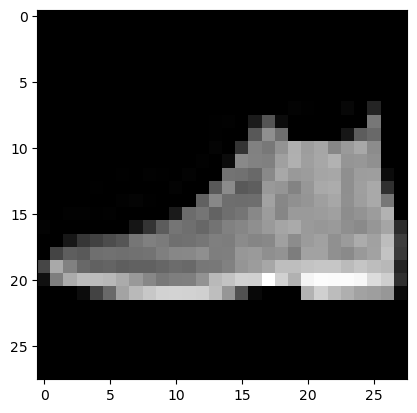

In [66]:
#Lets print the image as well
import matplotlib.pyplot as plt
plt.imshow(testX[0],cmap='gray')